환경세팅

```
Jupyter==1.0.0
networks==2.5
snap-stanford==5.0.0
matplotlib==3.2.2
pandas==1.1.3
scipy==1.6.2
```

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib as plt

## 1. 무방향 그래프

In [25]:
G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Paris', 'Dublin'), ('Milan', 'Rome')]  # 방향을 지정하지 않아도 됨
G.add_nodes_from(V)
G.add_edges_from(E)

V = ['Milan', 'Dublin', 'Paris', 'Rome']
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Dublin', 'Paris')]


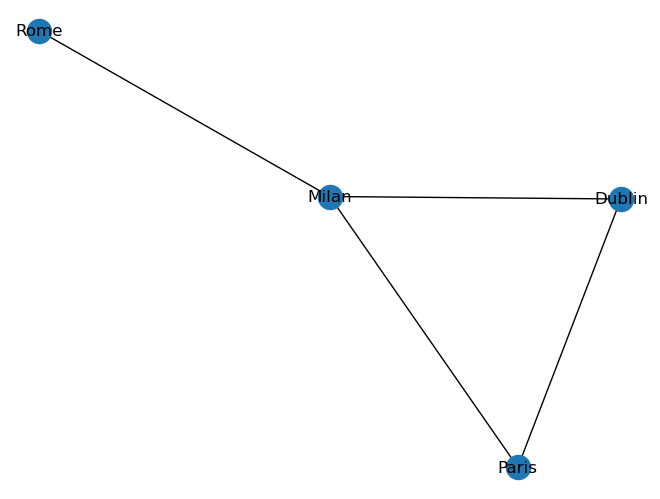

In [28]:
# 실행
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

nx.draw(G, with_labels = True)

그래프의 order, size, degree, neighbor

In [9]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v:list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Milan': 3, 'Dublin': 2, 'Paris': 2, 'Rome': 1}
Neighbors for nodes: {'Milan': ['Dublin', 'Paris', 'Rome'], 'Dublin': ['Milan', 'Paris'], 'Paris': ['Milan', 'Dublin'], 'Rome': ['Milan']}


특정 그래프에 대한 에고 그래프

In [11]:
ego_graph_milan = nx.ego_graph(G, "Milan")

print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Milan', 'Dublin', 'Paris', 'Rome']
Edges: [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Dublin', 'Paris')]


노드와 간선 추가

In [13]:
# 새로운 노드와 변 추가하기
new_nodes = {'London', 'Madrid'}
new_edges = [('London', 'Rome'), ('Madrid', 'Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V={G.nodes}")
print(f"E={G.edges}")

nx.draw(G, with_labels = True)

V=['Milan', 'Dublin', 'Paris', 'Rome', 'London', 'Madrid']
E=[('Milan', 'Dublin'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Dublin', 'Paris'), ('Paris', 'Madrid'), ('Rome', 'London')]


노드와 간선 삭제

In [14]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Milan', 'Dublin', 'Paris', 'Rome']
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Milan', 'Rome'), ('Dublin', 'Paris')]


In [16]:
edge_remove = [('Milan', 'Dublin'), ('Milan', 'Paris')]
G.remove_edges_from(edge_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Milan', 'Dublin', 'Paris', 'Rome']
E = [('Milan', 'Rome'), ('Dublin', 'Paris')]


## 2. 방향성 그래프

방향성 그래프

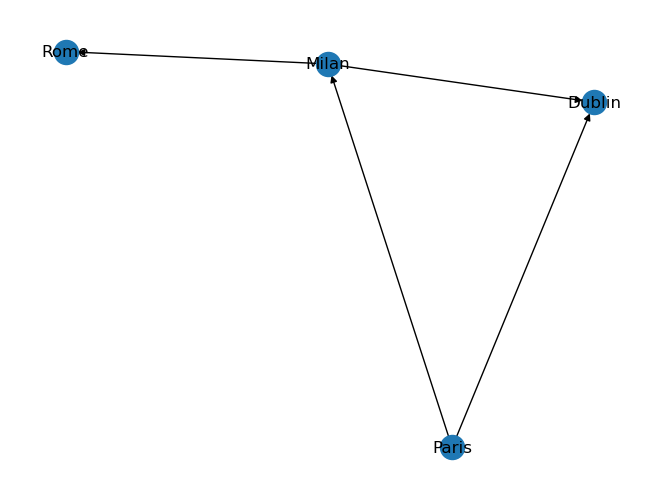

In [54]:
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

nx.draw(G, with_labels = True)

In [22]:
print(f"노드에 대한 입력차수: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"노드에 대한 출력차수: { {v: G.out_degree(v) for v in G.nodes} }")

노드에 대한 입력차수: {'Milan': 1, 'Deblin': 0, 'Paris': 0, 'Rome': 1, 'Dublin': 2}
노드에 대한 출력차수: {'Milan': 2, 'Deblin': 0, 'Paris': 2, 'Rome': 0, 'Dublin': 0}


다중그래프

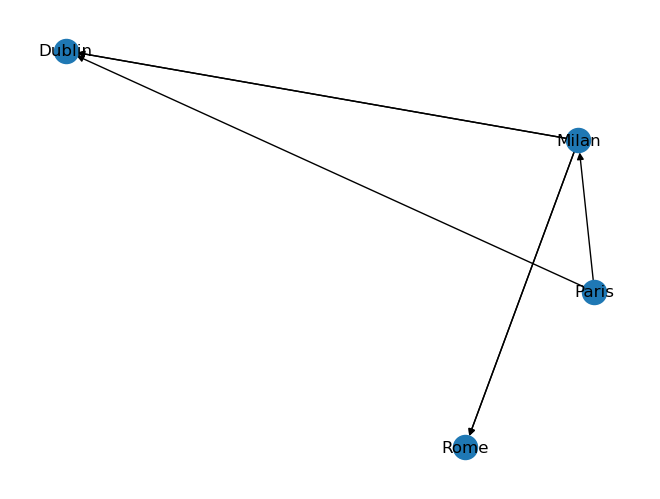

In [64]:
directed_multi_graph = nx.MultiDiGraph()
undirected_multi_graph = nx.MultiGraph()

V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Milan', 'Dublin'), ('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Rome'), ('Milan', 'Rome')]

directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

undirected_multi_graph.add_nodes_from(V)
undirected_multi_graph.add_edges_from(E)

nx.draw(directed_multi_graph, with_labels = True)
# nx.draw(undirected_multi_graph, with_labels = True)

가중그래프

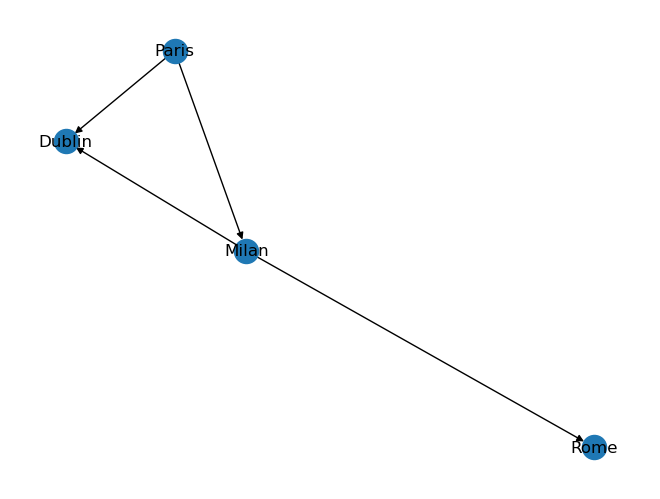

In [73]:
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin', 19), ('Paris', 'Milan', 8), ('Paris', 'Dublin', 11), ('Milan', 'Rome', 5)]

G.add_nodes_from(V)
G.add_weighted_edges_from(E)
nx.draw(G, with_labels = True)

이분그래프

In [81]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 == 0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 == 1]

iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),
    np.random.choice(top_nodes, n_edges))

edges = pd.DataFrame([ {"source": a, "target": b} for a, b in iter_edges ])

B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipatite = 0)
B.add_nodes_from(top_nodes, bipatite = 1)
B.add_edges_from([tuple(x) for x in edges.values])

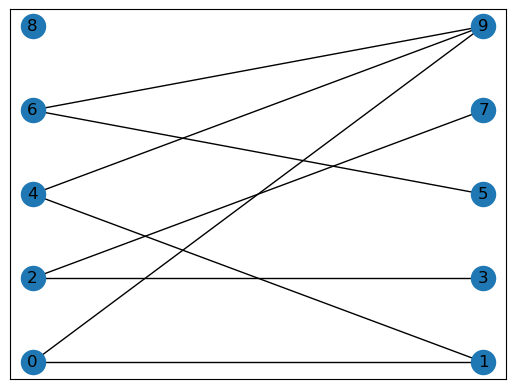

In [84]:
# 그래프 그리기

from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos = pos)

## 3. 그래프 표현

* 인접행렬
* 간선 리스트

인접행렬

In [85]:
nx.to_pandas_adjacency(G)  # pd DataFrame로 구하는 인접행렬

,Milan,Dublin,Paris,Rome
Milan,0.0,19.0,0.0,5.0
Dublin,0.0,0.0,0.0,0.0
Paris,8.0,11.0,0.0,0.0
Rome,0.0,0.0,0.0,0.0


In [86]:
nx.to_numpy_matrix(G)      # np numpy로 구하는 인접행렬. 노드의 이름을 나타낼 수 없으므로 G에 정의된 순서를 따른다

matrix([[ 0., 19.,  0.,  5.],
        [ 0.,  0.,  0.,  0.],
        [ 8., 11.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]])

간선 리스트

In [87]:
print(nx.to_pandas_edgelist(G))

  source  target  weight
0  Milan  Dublin      19
1  Milan    Rome       5
2  Paris   Milan       8
3  Paris  Dublin      11


In [88]:
print(nx.to_dict_of_dicts(G))

{'Milan': {'Dublin': {'weight': 19}, 'Rome': {'weight': 5}}, 'Dublin': {}, 'Paris': {'Milan': {'weight': 8}, 'Dublin': {'weight': 11}}, 'Rome': {}}


## 4. 그래프 plotting

좌표를 지정하지 않고도 그래프를 그리는 방법들

* networkx
* Gephi

networkx: 단순한 그래프는 표현하기 좋지만 복잡한 그래프는 표현하기 

In [101]:
def draw_graph(G, nodes_position, weight):
    nx.draw(G, nodes_position, with_labels = True, font_size=15, node_size = 400, edge_color = 'gray', arrowsize = 30)
    if weight:
        edge_labels = nx.get_edge_attributes(G, 'weight')
        print(edge_labels)
        nx.draw_networkx_edge_labels(G, nodes_position, edge_labels = edge_labels)

{('Milan', 'Paris'): 8, ('Milan', 'Rome'): 5, ('Milan', 'Dublin'): 19, ('Dublin', 'Paris'): 11}


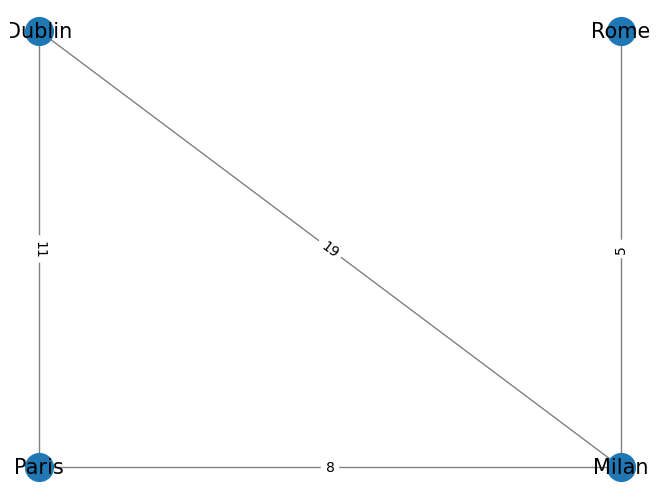

In [102]:
G = nx.Graph()
V = {'Paris', 'Dublin', 'Milan', 'Rome'}
E = [('Paris', 'Dublin', 11), ('Paris', 'Milan', 8), ('Milan', 'Rome', 5), ('Milan', 'Dublin', 19)]

G.add_nodes_from(V)
G.add_weighted_edges_from(E)

nodes_position = {'Paris': [0,0], "Dublin": [0,1], "Milan": [1,0], "Rome": [1,1]}

draw_graph(G, nodes_position, True)

## 5. 그래프 속성

그래프 파생 측정지표

* 통합 측정 지표: 노드가 서로 상호 연결되는 경향을 측정한다
* 분리 측정 지표: 네트워크 내에서 커뮤니티 또는 모듈로 알려진 상호 연결된 노드 그룹의 존재를 정량화한다
* 중심성 측정 지표: 네트워크 내부의 개별 노드의 중요성을 평가한다
* 탄력성 측정 지표: 네트워크가 장애 또는 기타 불리한 조건에 직면했을 때 운영 성능을 얼마나 유지하고 조정할 수 있는지에 대한 척도

통합 측정 지표

* 거리: 근원노드 (source node)에서 목적노드 (target node)에 도달하기 위해 거쳐가야 하는 간선의 수
* 경로: 노드 $i$와 노드 $j$를 연결하는 간선의 집합
* 최단경로: 노드 $i$와 노드 $j$ 사이의 가능한 모든 경로에 대해 간선의 수가 가장 적은 경로
* 지름: 가능한 모든 최단경로 중 가장 긴 최단경로에 포함된 간선의 수

In [105]:
G = nx.Graph()
nodes = {1: 'Dublin', 2: 'Paris', 3: 'Milan', 4: 'Rome', 5: 'Naples', 6: 'Moscow', 7: 'Seoul'}

G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (6,7), (7,5)])

In [108]:
path = nx.shortest_path(G, source = 1, target = 7)
path

[1, 3, 4, 5, 7]

* 특성경로 길이: 가능한 모든 노드 쌍 사이의 모든 최단경로 길이의 평균

그러나 연결이 끊긴 그래프에서는 모든 노드 간의 경로를 계산할 수 없기 때문에 이 측정지표를 항상 정의할 수는 없다. 이러한 이유로 **네트워크 효율성**도 널리 사용된다.

In [109]:
nx.average_shortest_path_length(G)

2.1904761904761907

* 대역 효율성: 모든 노드 쌍에 대한 역최단경로 길이의 평균. 네트워크를 통해 정보가 얼마나 효율적으로 교환되는지에 대한 척도로 볼 수 있다.


In [110]:
nx.global_efficiency(G)

0.611111111111111

In [111]:
nx.local_efficiency(G)  # 평균 대역 효율성

0.6666666666666667

분리 측정 지표: 그룹의 존재에 대한 정보들

* 군집계수: 얼마나 많은 노드가 함께 군집되는지 픅정

In [112]:
nx.average_clustering(G)

0.6666666666666667

In [113]:
nx.clustering(G)  # 국소 군집 계수

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

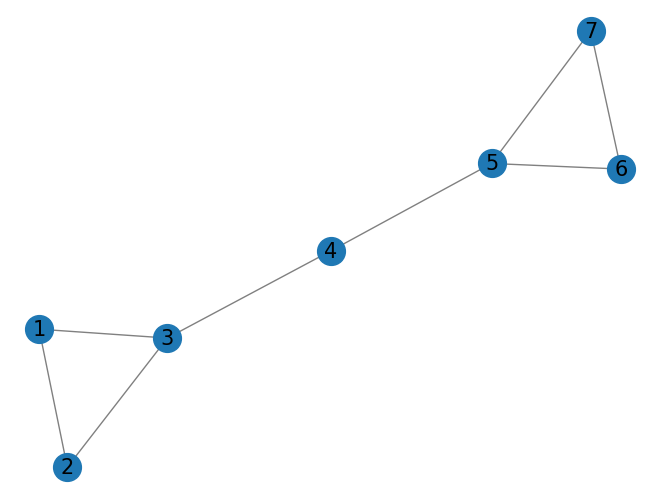

In [114]:
nx.draw(G, with_labels = True, font_size=15, node_size = 400, edge_color = 'gray', arrowsize = 30)

* 전이성: 닫힌 세 짝의 개수와 그래프에서 가능한 닫힌 세 짝의 최대값의 비

In [115]:
nx.transitivity(G)

0.5454545454545454

* 모듈성: 그룹 혹은 군집. 높은 모듈성을 가진 네트워크는 모듈 내에서 밀집된 연결을 보여주고 모듈 간의 연결의 희박하게 나타날 것이다. 모듈성은 보통 최적화 알고리즘으로 계산한다.

In [118]:
import networkx.algorithms.community as nx_comm
nx_comm.modularity(G, communities = [{1,2,3}, {4,5,6,7}])  # communities는 각 그래프의 분할을 나타내는 집합의 리스트를 의미한다

0.3671875

중심성 측정 지표

* 연결 중심성: 노드의 차수와 특정 노드 $i$의 입사간선의 개수와 직접적으로 연관되어 있다.

직관적으로 노드가 다른 노드에 더 많이 연결될수록 해당 노드의 연결 중심성은 더 높은 값을 가진다. 그래프가 방향성 그래프라면 들어오는 간선과 나가는 간선의 수와 관련해 각 노드에 대한 **내차 중심성**과 **외차 중심성**을 고려해야 한다.

In [119]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

* 근접 중심성: 노드가 다른 노드와 얼마나 가까운지 (잘 연결되어 있는지)를 정량화한다. 이는 네트워크의 다른 모든 노드까지의 평균거리를 나타낸다.

In [120]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

* 매개 중심성: 노드가 다른 노드 간의 다리역할을 하는 정도를 평가한다. 연결상태가 좋지 않더라도 노드를 전략적으로 연결할 수 있으므로 전체 네트워크를 연결 상태로 유지하는 데 도움이 된다.

In [121]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

탄력성 측정 지표: 네트워크의 복원력을 측정하는 지표

* 동류성 계수: 노드가 비슷한 노드에 연결되는 경향을 정량화하는 데 사용된다.

정량화를 위한 지표로 **피어슨 상관계수**를 사용해 직접 연결된 노드 차수간의 상관성을 측정할 수 있다.
이 때, 비슷한 차수를 갖는 노드 사이에 상관관계가 있을 때의 양의 값을 가정하고 다른차수의 노드 사이에 상관관계가 있는 경우 음의 값을 가정한다.

소셜 네트워크 대부분은 동류성을 가진다. 그러나 유명 가수나 축구선수, 패션 블로거와 같은 인플루언서는 다른 여러 사용자가 팔로우(입력간선)하는 경향이 있으며, 서로 연결되고 비동류적인 행동을 보이는 경향이 있다.

In [122]:
nx.degree_pearson_correlation_coefficient(G)

-0.6

## 6. 벤치마크 데이터

완전연결그래프를 그려보자. 완전연결그래프 자체는 그다지 흥미롭지 않지만 더 큰 그래프를 구성하는 기본 구성요소 (building block)로 생각할 수 있다. 다 큰 그래프에서 $n$개의 노드로 구성된 완전연결부분그래프는 일반적으로 크기가 $n$인 클리크 (clique)라고 한다.

> 무방향그래프에서 **클리크** $C$는 무방향그래프 노드의 부분집합 $(C \subset V)$으로 부분집합의 서로 다른 두 노드는 인접한다. 이는 $C$에 의해 유도된 $G$의 유도부분그래프 (induced subgraph)가 완전연결그래프라는 조건과 동치다.

클리크는 그래프 이론의 기본 개념 중 하나로 관계를 인코딩해야 하는 수학적 문제에서도 자주 사용된다. 또한 더 복잡한 그래프를 구성할 때 가장 단순한 단위를 나타내기도 한다. 반면에 더 큰 그래프에서 주어진 $n$개 크기의 클리크를 찾는 작업은 컴퓨터 공학에서 연구되는 **비결정적 다항시간 완전문제** (NP-complete)로 밝혀졌다.

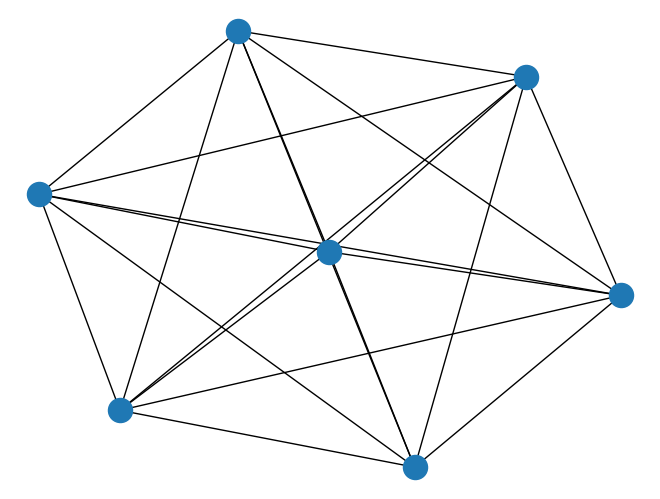

In [124]:
# 완전연결 무향그래프를 만들어보자.
complete = nx.complete_graph(n=7)
nx.draw(complete)

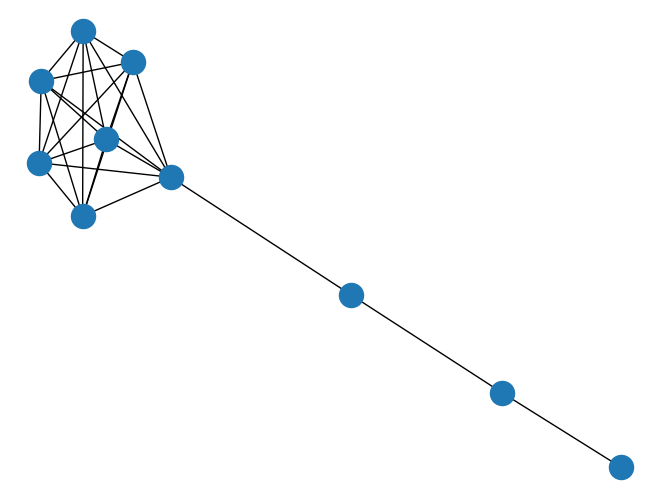

In [125]:
lollipop = nx.lollipop_graph(m=7, n=3)  # 크기가 3인 클리크와 7개의 노드가지가 있는 그래프
nx.draw(lollipop)

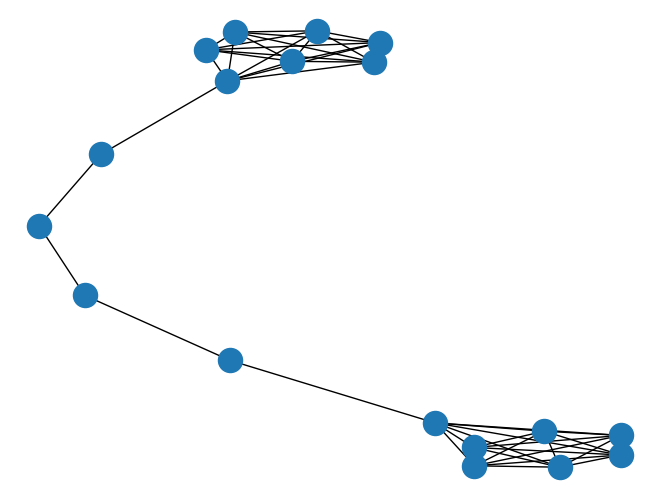

In [126]:
barbell = nx.barbell_graph(m1=7, m2=4)  # 크기가 m1, m2인 2개의 클리크가 노드가지로 연결된 그래프
nx.draw(barbell)

그래프의 병합

In [127]:
def get_random_node(graph):
    return np.random.choice(graph.nodes)

allGraphs = nx.compose_all([complete, barbell, lollipop])
allGraphs.add_edge(get_random_node(lollipop), get_random_node(lollipop))
allGraphs.add_edge(get_random_node(complete), get_random_node(barbell))

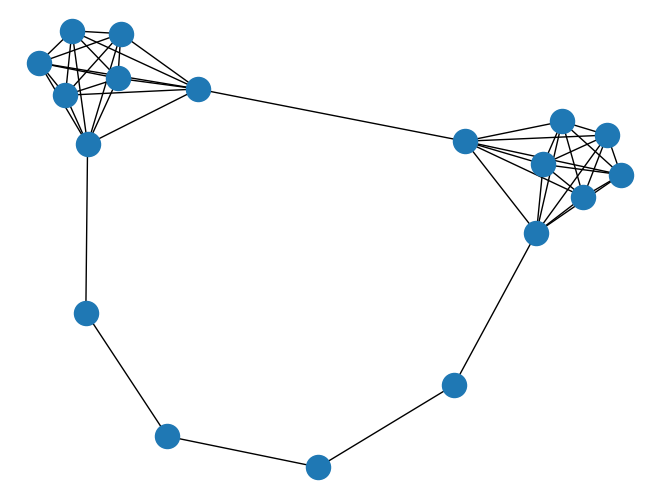

In [128]:
nx.draw(allGraphs)

## 7. 그래프 생성 모델

* 확률모델

* 생성모델

여기서는 무작위로 생성된 그래프의 몇 가지 모델을 소개하겠다.

1. 와프-스트로가츠 모델

**좁은세상 네트워크**라고 부르며, 소셜 네트워크와 유사한 모형이다. ring을 기반으로 만들어진다.

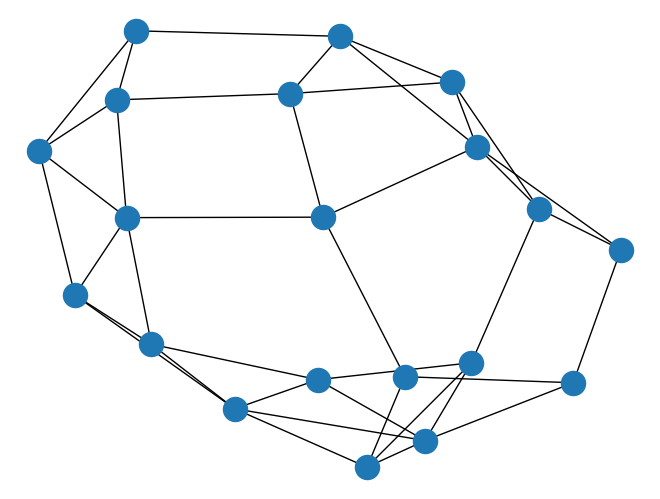

In [133]:
graph = nx.watts_strogatz_graph(n = 20, k = 5, p = 0.2)
nx.draw(graph)

2. 바라바시-알베르트 모델

더 많은 근방이 있는 노드를 선호하는 **우선연결 스키마**를 사용해 범위를 한정할 수 없는 또는 **척도불변(scale-free)** 임의 네트워크를 생성하는 모델이다. 예시로는 Web 네트워크가 있다.

Counter({3: 13, 7: 2, 5: 2, 10: 1, 9: 1, 8: 1})


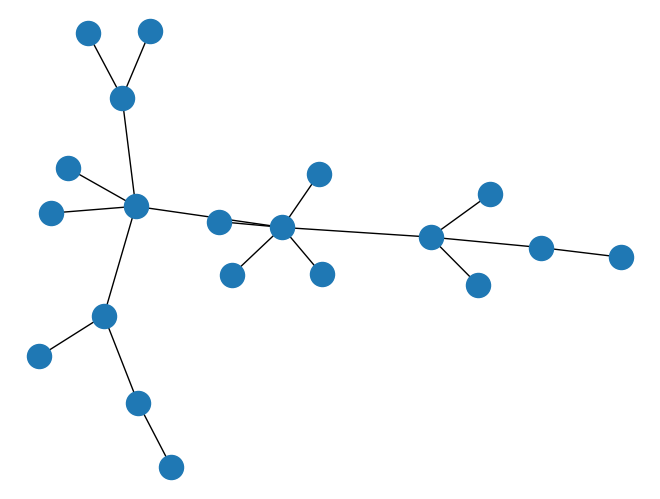

In [140]:
from collections import Counter

ba_model = nx.extended_barabasi_albert_graph(n=20, m = 1, p = 0, q = 0)
degree = dict(nx.degree(ba_model)).values()
bins = np.round(np.logspace(np.log10(min(degree)), np.log10(max(degree)), 10))

cnt = Counter(np.digitize(np.array(list(degree)), bins))

print(cnt)
nx.draw(ba_model)